In [6]:
import pandas as pd
data = pd.read_csv('/Users/aleksandrbogdanov/MyJupyterNotebook/Datasets/i-1572__i3d.txt', sep=',')
data

,#,Object volume,Object surface,Volume of pores,Surface of pores,Porosity,Number of pores,Centroid x,Centroid y,Centroid z,...,Volume-equivalent sphere diameter,Surface-equivalent sphere diameter,Sauter diameter,Sphericity,Mean density,Maximum density,Surface convexity index,Euler number,Connectivity,Unnamed: 36
0,1,0.00732,0.21566,0.0,0.0,0.0,0,276.99365,242.06069,5.99859,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN
1,2,0.02929,0.56782,0.0,0.0,0.0,0,271.34792,242.94284,5.99859,...,0.38245,0.42514,0.30949,0.80924,NaN,NaN,NaN,1,0,NaN
2,3,0.00732,0.21566,0.0,0.0,0.0,0,276.99365,242.76641,5.99859,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN
3,4,0.00732,0.21566,0.0,0.0,0.0,0,277.69936,242.76641,5.99859,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN
4,5,0.00732,0.21566,0.0,0.0,0.0,0,270.64220,243.11927,5.99859,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162292,162293,0.00732,0.21566,0.0,0.0,0.0,0,293.57798,543.04869,325.33522,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN
162293,162294,0.00732,0.21566,0.0,0.0,0.0,0,294.28370,543.04869,325.33522,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN
162294,162295,0.00732,0.21566,0.0,0.0,0.0,0,293.93084,543.40155,325.33522,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN
162295,162296,0.00732,0.21566,0.0,0.0,0.0,0,295.34227,543.40155,325.33522,...,0.24093,0.26200,0.20372,0.84558,NaN,NaN,NaN,1,0,NaN


In [7]:
# Посмотрим на объем объекта

data['Object volume'].value_counts()

Object volume
0.00732      106559
0.02929       12441
0.06224        2384
0.05126         911
0.09519         787
              ...  
62.64069          1
1.58126           1
2.28640           1
121.74415         1
3.23098           1
Name: count, Length: 13288, dtype: int64

In [20]:
data['Volume-equivalent sphere diameter'].max()

71.9329

In [8]:
# Создадим новую таблицу с нужными столбцами

relevant_data = data.loc[:, ['Object volume', 'Volume-equivalent sphere diameter']]
relevant_data

,Object volume,Volume-equivalent sphere diameter
0,0.00732,0.24093
1,0.02929,0.38245
2,0.00732,0.24093
3,0.00732,0.24093
4,0.00732,0.24093
...,...,...
162292,0.00732,0.24093
162293,0.00732,0.24093
162294,0.00732,0.24093
162295,0.00732,0.24093


Создаем интервалы для баров - где будем группировать
Группируем от 0 до 2 с шагом 0.05, от 2 до 10 с шагом 0.1, от 10 и далее с шагом 0.5

In [2]:

bins_2_10 = [round(i, 1) for i in np.arange(0, 10, 0.5)]
bins_10_max = [10]
bins_10_max

[10]

In [4]:
bins_list = np.concatenate((bins_2_10, bins_10_max))
bins_list

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [9]:
# Создали новый столбец с полями группировки (бинами)
relevant_data['Bars Name'] = pd.cut(relevant_data['Volume-equivalent sphere diameter'], bins_list, labels=bins_list[1:]).astype(float)

In [10]:
relevant_data['Bars Name'].value_counts()

Bars Name
0.5     122295
1.5      12630
1.0      10230
2.0       6578
2.5       3795
3.0       2272
3.5       1511
4.0       1083
4.5        688
5.0        404
5.5        249
6.0        174
6.5        117
7.0         82
7.5         48
8.0         40
8.5         23
9.0         18
9.5         10
10.0         6
Name: count, dtype: int64

In [21]:
relevant_data[relevant_data['Volume-equivalent sphere diameter'] == 71.9329]

,Object volume,Volume-equivalent sphere diameter,Bars Name
1729,194886.3232,71.9329,NaN


In [26]:
relevant_data[relevant_data['Volume-equivalent sphere diameter'] >= 10]

,Object volume,Volume-equivalent sphere diameter,Bars Name
1729,194886.32320,71.93290,NaN
3345,709.87156,11.06778,NaN
3468,1014.78138,12.46784,NaN
3727,1053.12951,12.62296,NaN
4963,631.87778,10.64661,NaN
7948,3397.61299,18.65199,NaN
34579,1301.80805,13.54720,NaN
42763,529.09865,10.03489,NaN
44540,784.46962,11.44263,NaN
52682,811.00994,11.57024,NaN


In [27]:
relevant_data['Bars Name'] = relevant_data['Bars Name'].fillna(10)
relevant_data

In [28]:
relevant_data[relevant_data['Volume-equivalent sphere diameter'] >= 10]

,Object volume,Volume-equivalent sphere diameter,Bars Name
1729,194886.32320,71.93290,10.0
3345,709.87156,11.06778,10.0
3468,1014.78138,12.46784,10.0
3727,1053.12951,12.62296,10.0
4963,631.87778,10.64661,10.0
7948,3397.61299,18.65199,10.0
34579,1301.80805,13.54720,10.0
42763,529.09865,10.03489,10.0
44540,784.46962,11.44263,10.0
52682,811.00994,11.57024,10.0


In [29]:
group_bars = relevant_data.groupby('Bars Name')
group_bars['Object volume'].sum()

Bars Name
0.5       1339.48679
1.0       3186.69596
1.5      12540.38822
2.0      18107.58561
2.5      22253.77140
3.0      24352.08510
3.5      26795.18851
4.0      29626.96535
4.5      27400.68784
5.0      22480.57655
5.5      18695.70279
6.0      17144.22082
6.5      14914.94421
7.0      12956.21213
7.5       9372.91243
8.0       9587.97674
8.5       6679.26372
9.0       6338.30535
9.5       4164.12442
10.0    246522.00099
Name: Object volume, dtype: float64

In [30]:
# Посчитали % Пористости

percent = (group_bars['Object volume'].sum()/relevant_data['Object volume'].sum()) * 100


In [31]:
# Берем значения баров-бинов
bars_name = group_bars['Bars Name'].groups.keys()
bars_name_list = np.array([i for i in bars_name])
bars_name_list

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [32]:
# Один бар занимает 80 единиц - 40 ширина и 20 - длина до другого

bar_position = np.array([i for i in np.arange(1, bars_name_list.shape[0]*100 + 1, 100)])
bar_position

array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])

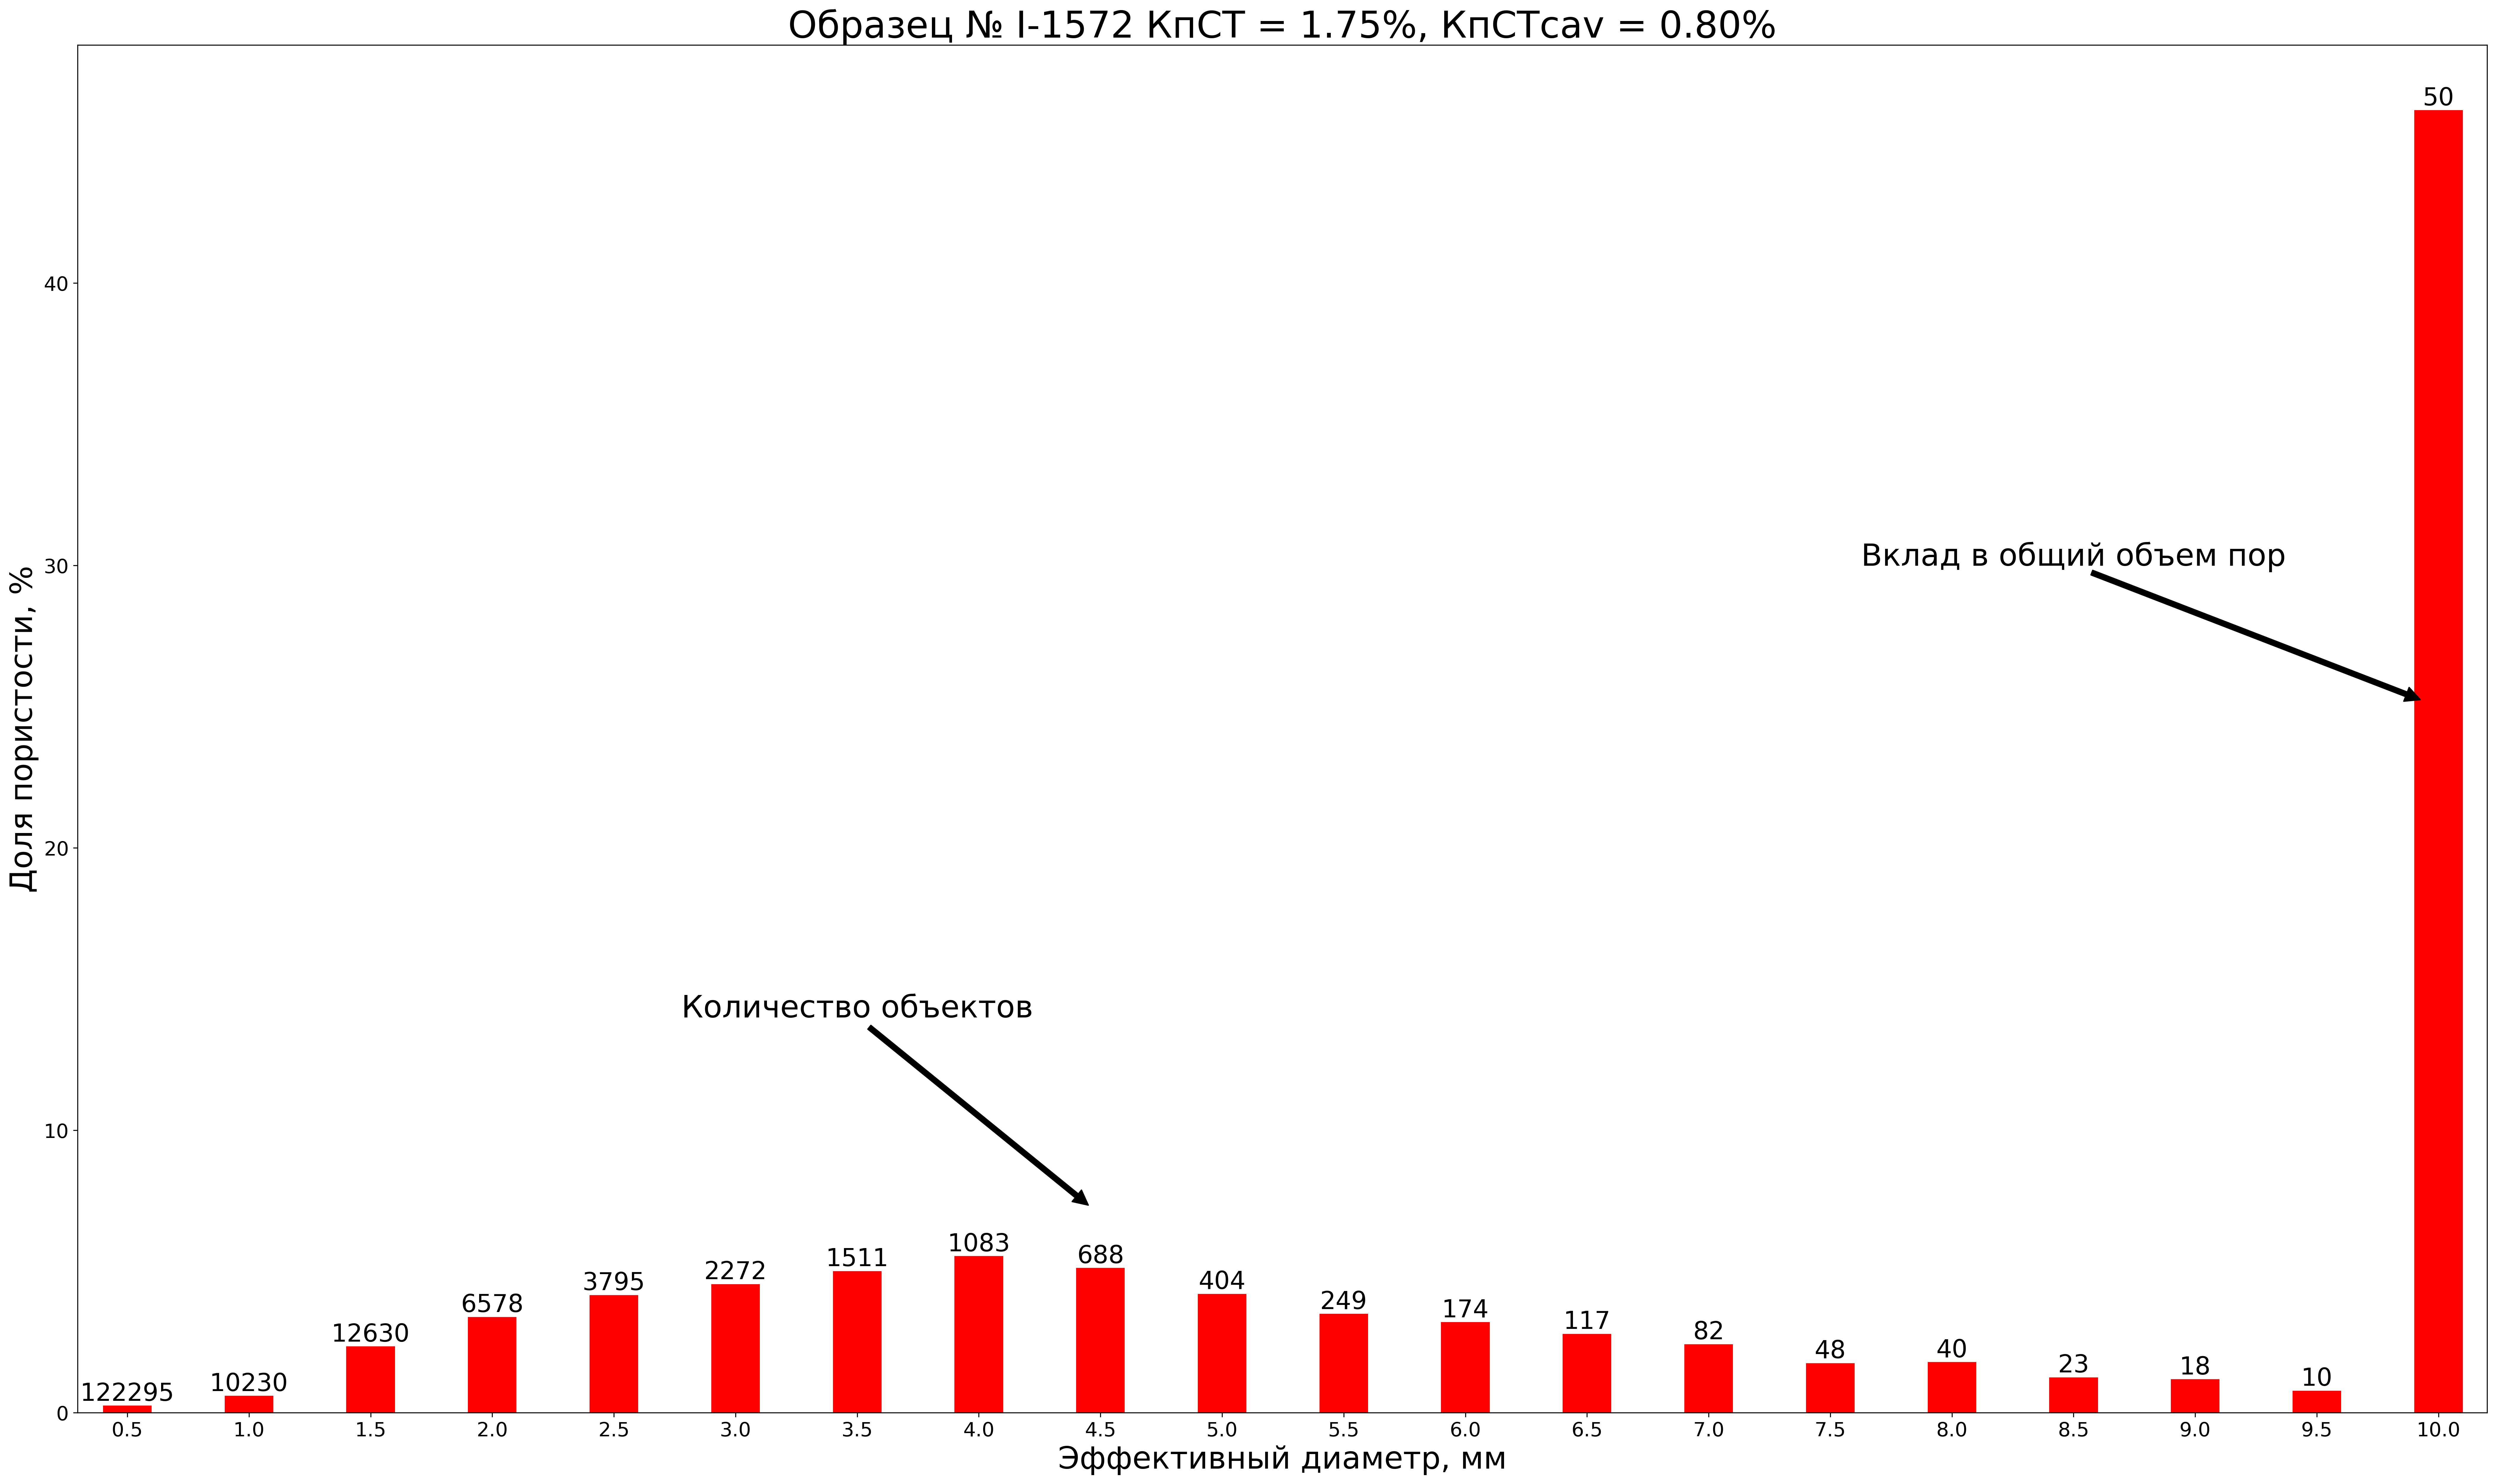

In [53]:
# Ширина бара 40
import matplotlib.pyplot as plt

# Создаем плот, dpi - качество фигуры
plt.figure(figsize=(35,20), dpi=300)

# Создаем контейнер баров, ось х - позиция бара, у - процент пористости, ширина бара = 40
bars = plt.bar(bar_position, percent, width=40, color = 'red')

# Создаем подписи к бару, подписи - значения Bars Name, 
bar_label = plt.bar_label(bars, labels=group_bars['Volume-equivalent sphere diameter'].count(), rotation = 'horizontal', fontsize = 20)

# Выставляем верный диаметр, подписи осей и их границы
diameter = np.round(list(group_bars.groups.keys()), 2)
plt.xticks(bar_position, diameter, fontsize = 30)
plt.xlim((0-40, bar_position.max()+40))

# Добавляем текст на рисунок
plt.text(bar_position[6] , 14, 'Количество объектов', fontsize=25, ha='center')
plt.annotate('', xy=(bar_position[8], 7), xytext=(bar_position[6], 14),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.text(bar_position[16] , 30, 'Вклад в общий объем пор', fontsize=25, ha='center')
plt.annotate('', xy=(bar_position[19], 25), xytext=(bar_position[16], 30),
             arrowprops=dict(facecolor='black', shrink=0.05))


plt.xlabel('Эффективный диаметр, мм', fontsize=25)
plt.ylabel('Доля пористости, %', fontsize=25)
plt.title('Образец № I-1572 КпСТ = 1.75%, КпСТcav = 0.80%', fontsize = 30)
plt.tick_params(labelsize=16)
plt.show()